**STOCK PRICE PREDICTION**

importing the data from the google

In [ ]:
import yfinance as yf

# Define the ticker symbol for Google (GOOGL)
ticker = "GOOGL"

# Set the start and end dates for the data
start_date = "2012-01-03"
end_date = "2016-12-30"

# Fetch the historical data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Print the data
print(data)
data.to_csv("google_stock_prices.csv")


[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  16.339840  16.720470  16.325577  16.651901  16.651901  146912940
2012-01-04  16.642391  16.773024  16.532032  16.723724  16.723724  114445440
2012-01-05  16.569820  16.615866  16.422173  16.491741  16.491741  131184684
2012-01-06  16.495245  16.516518  16.261011  16.266768  16.266768  107608284
2012-01-09  16.178679  16.191191  15.546296  15.577077  15.577077  232671096
...               ...        ...        ...        ...        ...        ...
2016-12-22  40.455002  40.553501  40.301498  40.484001  40.484001   22632000
2016-12-23  40.400501  40.548500  40.255501  40.389999  40.389999   15310000
2016-12-27  40.433998  40.799999  40.290001  40.496498  40.496498   19520000
2016-12-28  40.666500  40.666500  40.122002  40.228500  40.228500   24296000
2016-12

importing necessary libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


importing the dataset

In [ ]:
# Load the historical stock price dataset
data = pd.read_csv("google_stock_prices.csv")  # Replace with the path to your dataset

Checking for NULL Values

In [ ]:
print("Null Values:\n", data.isnull().sum())

Null Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


DATA PREPROCESSING

In [ ]:
# Data preprocessing
# Assuming the dataset has columns: Date, Open, Close, High, Low, Volume
# You may need to adjust column names or perform additional preprocessing based on your dataset


# Split the dataset into features (X) and target variable (y)
X = data[['Open', 'High', 'Low', 'Volume']]  # Adjust column names as needed
y = data['Close']  # Adjust column name as needed

print("X shape:", X.shape)
print("y shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X shape: (1257, 4)
y shape: (1257,)
X_train shape: (1005, 4)
X_test shape: (252, 4)
y_train shape: (1005,)
y_test shape: (252,)


APPLYING ML ALGORITHMIS

In [ ]:
# Choose a model (linear regression in this example)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.019274365662564238


GRAP PLOT


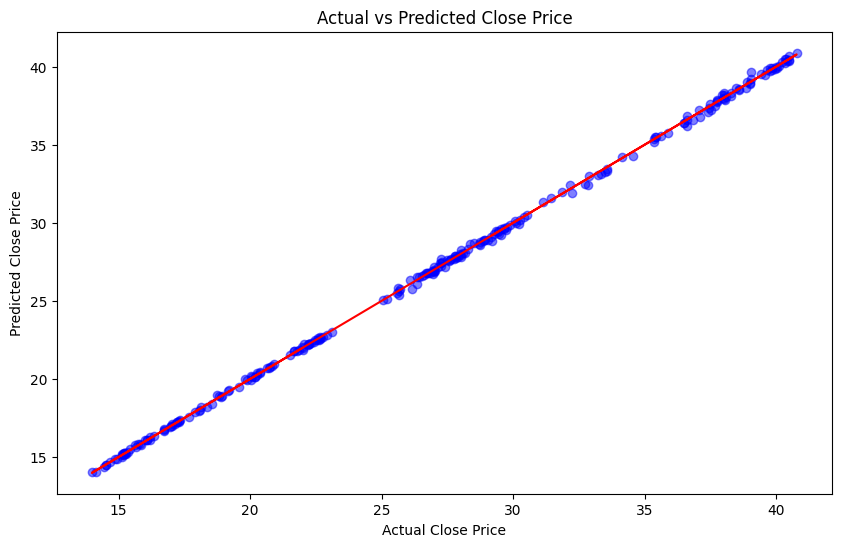

In [ ]:
# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.show()

In [ ]:
# Get the final prediction for a new data point
new_data = X_test.iloc[0].values.reshape(1, -1)
final_prediction = model.predict(new_data)
print("Final Prediction:", final_prediction)


Final Prediction: [22.01210248]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
